# Stock Price Prediction using Stacked LSTM

### Long Short-Term Memory: (LSTM)

**Long Short-Term Memory** (or) **LSTMs** are widely used for sequence prediction
problems and have proven to be extremely effective. The reason they work so well is
because LSTM is **able to store past information that is important and forget the
information that is not relevant**. LSTM has three types of gates:

1. The input gate: The input gate adds information to the cell state.
2. The forget gate: It removes the information that is no longer required by the model.
3. The output gate: Output Gate at LSTM selects the information to be shown as output.

Training was done under the following metrics and functions:
1. Number of layers = 4
2. Loss Function= Mean Square Error
3. Optimizer = Adam
4. Epochs = 100
5. Batch size = 64

### Importing the Necessary Libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### Importing the Data
Here we are making use of Tata's stock price values from 2010 to 2018

In [43]:
df = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [44]:
df.shape

(2035, 8)

In [45]:
# sorting the data in ascending order of date
df = df.sort_values(by='Date')
df = df.reset_index()

In [46]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [47]:
df.tail()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2034,0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 2035 non-null   int64  
 1   Date                  2035 non-null   object 
 2   Open                  2035 non-null   float64
 3   High                  2035 non-null   float64
 4   Low                   2035 non-null   float64
 5   Last                  2035 non-null   float64
 6   Close                 2035 non-null   float64
 7   Total Trade Quantity  2035 non-null   int64  
 8   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 143.2+ KB


In [49]:
df.describe()

,index,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,1017.000000,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,587.598219,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,0.000000,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,508.500000,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,1017.000000,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,1525.500000,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,2034.000000,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


### Data Cleaning and Filtering

In [50]:
close_prices = df['Close']
close_prices

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

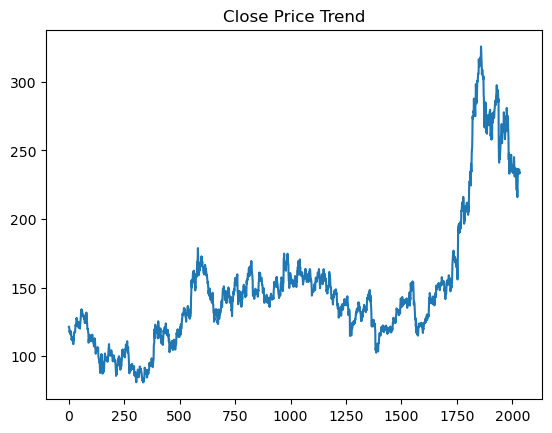

In [51]:
# checking the trend in close prices from start date to end date
plt.plot(close_prices)
plt.title("Close Price Trend")
plt.show()

Since LSTM is sensitive to the scale of the data, we apply the MinMax scaler here to get the values in the range of 0-1

In [52]:
close_prices

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [53]:
scaler = MinMaxScaler(feature_range=(0,1))
close_prices = scaler.fit_transform(np.array(close_prices).reshape(-1,1))

In [54]:
close_prices

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

### Split the data into training and testing sets

In [55]:
training_size = int(len(close_prices) * 0.7)
testing_size = len(close_prices) - training_size
training_size, testing_size

(1424, 611)

In [56]:
train_data = close_prices[0:training_size, :]
test_data = close_prices[training_size:len(close_prices), :1]

In [57]:
train_data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.15012255],
       [0.15747549],
       [0.15277778]])

In [58]:
test_data

array([[0.1621732 ],
       [0.15951797],
       [0.16707516],
       [0.15992647],
       [0.16053922],
       [0.16441993],
       [0.16687092],
       [0.1693219 ],
       [0.16074346],
       [0.15972222],
       [0.16401144],
       [0.15727124],
       [0.14705882],
       [0.14460784],
       [0.15175654],
       [0.15441176],
       [0.15216503],
       [0.14848856],
       [0.15522876],
       [0.15767974],
       [0.1621732 ],
       [0.16094771],
       [0.16339869],
       [0.15931373],
       [0.15972222],
       [0.16115196],
       [0.16666667],
       [0.15747549],
       [0.15379902],
       [0.14848856],
       [0.15114379],
       [0.1503268 ],
       [0.15155229],
       [0.15645425],
       [0.16033497],
       [0.1566585 ],
       [0.15686275],
       [0.17749183],
       [0.17973856],
       [0.1744281 ],
       [0.19281046],
       [0.18607026],
       [0.18811275],
       [0.18443627],
       [0.18280229],
       [0.18464052],
       [0.18178105],
       [0.189

Here, we are converting the given 1 dimensional into a matrix. Here, we choose a time_step, which decides the number of values to be used as input features. So, for a particular index i, **i to i + time_step-1** is taken as the input feature, and **i + time_step** is taken as the output.

In [59]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ### i = 0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [60]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [61]:
X_train.shape, y_train.shape

((1323, 100), (1323,))

In [62]:
X_test.shape, y_test.shape

((510, 100), (510,))

In [63]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### Create the Stacked LSTM model

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [65]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 9s 202ms/step - loss: 0.0103 - val_loss: 0.0259
Epoch 2/100
21/21 [==============================] - 3s 144ms/step - loss: 0.0020 - val_loss: 0.0059
Epoch 3/100
21/21 [==============================] - 3s 143ms/step - loss: 0.0010 - val_loss: 0.0042
Epoch 4/100
21/21 [==============================] - 3s 143ms/step - loss: 9.3529e-04 - val_loss: 0.0050
Epoch 5/100
21/21 [==============================] - 3s 142ms/step - loss: 9.0931e-04 - val_loss: 0.0046
Epoch 6/100
21/21 [==============================] - 3s 143ms/step - loss: 8.7086e-04 - val_loss: 0.0041
Epoch 7/100
21/21 [==============================] - 3s 149ms/step - loss: 8.3591e-04 - val_loss: 0.0051
Epoch 8/100
21/21 [==============================] - 3s 153ms/step - loss: 8.0748e-04 - val_loss: 0.0039
Epoch 9/100
21/21 [==============================] - 3s 148ms/step - loss: 7.7752e-04 - val_loss: 0.0040
Epoch 10/100
21/21 [==============================] - 3s 146ms/step

21/21 [==============================] - 4s 175ms/step - loss: 1.3328e-04 - val_loss: 0.0019
Epoch 79/100
21/21 [==============================] - 4s 171ms/step - loss: 1.3466e-04 - val_loss: 0.0023
Epoch 80/100
21/21 [==============================] - 4s 181ms/step - loss: 1.3074e-04 - val_loss: 0.0020
Epoch 81/100
21/21 [==============================] - 4s 181ms/step - loss: 1.3413e-04 - val_loss: 0.0032
Epoch 82/100
21/21 [==============================] - 4s 189ms/step - loss: 1.4016e-04 - val_loss: 0.0033
Epoch 83/100
21/21 [==============================] - 4s 179ms/step - loss: 1.3942e-04 - val_loss: 0.0031
Epoch 84/100
21/21 [==============================] - 4s 191ms/step - loss: 1.3728e-04 - val_loss: 0.0024
Epoch 85/100
21/21 [==============================] - 4s 181ms/step - loss: 1.4500e-04 - val_loss: 0.0013
Epoch 86/100
21/21 [==============================] - 4s 178ms/step - loss: 1.5365e-04 - val_loss: 0.0023
Epoch 87/100
21/21 [==============================] - 4s 17

In [68]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [69]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

16/16 [==============================] - 0s 28ms/step


Inverse transform is done to convert the data back to its original form

In [70]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

### Calculate RMSE performance metrics

In [71]:
import math
from sklearn.metrics import mean_squared_error

In [72]:
math.sqrt(mean_squared_error(y_train,train_predict))

133.98001417983494

In [73]:
math.sqrt(mean_squared_error(y_test,test_predict))

205.20123768579273

### Plotting

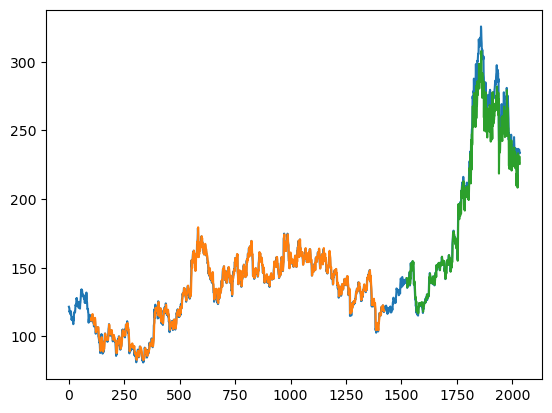

In [84]:
# green = test data, orange = train data
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(close_prices)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(close_prices)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_prices)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(close_prices))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [75]:
len(test_data)

611

Now we need to predict the value for 30 days into the future.
Here, we take the last 100 values, which would be used as input for calculating the output for the next day.

In [85]:
x_input=test_data[511:].reshape(1,-1)
x_input.shape

(1, 100)

In [87]:
# converting to list
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

### Prediction for next 30 days

In [88]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        # get the 100 days data from the input list
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        # reshape the input to be fed to the model
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        # make the prediction
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        # add the current output to the list of outputs
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        # reshape the input data to feed it to the LSTM model
        x_input = x_input.reshape((1, n_steps,1))
        # make the prediction
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        # add the current output to the list of outputs
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.59961885]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464

8 day output [[0.4202814]]
9 day input [0.66421569 0.67892157 0.69138072 0.70894608 0.72263072 0.73406863
 0.72120098 0.74979575 0.7689951  0.74468954 0.7120098  0.74673203
 0.75490196 0.76041667 0.75980392 0.74652778 0.76245915 0.77062908
 0.80412582 0.78104575 0.79411765 0.76021242 0.73488562 0.72406046
 0.73999183 0.74979575 0.76143791 0.75428922 0.74754902 0.76960784
 0.7495915  0.81719771 0.80208333 0.77736928 0.75714869 0.79370915
 0.79166667 0.77144608 0.75265523 0.72691993 0.6629902  0.68198529
 0.64419935 0.62152778 0.6439951  0.66319444 0.67544935 0.63705065
 0.64603758 0.65890523 0.65870098 0.67790033 0.63194444 0.63112745
 0.62785948 0.64767157 0.63991013 0.63480392 0.63868464 0.62336601
 0.62745098 0.63970588 0.64705882 0.66196895 0.67075163 0.65196078
 0.63112745 0.61294935 0.6376634  0.62254902 0.62745098 0.63337418
 0.62642974 0.63623366 0.58312908 0.57781863 0.57230392 0.58006536
 0.57618464 0.55167484 0.57883987 0.625      0.63582516 0.62949346
 0.62888072 0.62765523 

16 day output [[0.41981688]]
17 day input [0.7689951  0.74468954 0.7120098  0.74673203 0.75490196 0.76041667
 0.75980392 0.74652778 0.76245915 0.77062908 0.80412582 0.78104575
 0.79411765 0.76021242 0.73488562 0.72406046 0.73999183 0.74979575
 0.76143791 0.75428922 0.74754902 0.76960784 0.7495915  0.81719771
 0.80208333 0.77736928 0.75714869 0.79370915 0.79166667 0.77144608
 0.75265523 0.72691993 0.6629902  0.68198529 0.64419935 0.62152778
 0.6439951  0.66319444 0.67544935 0.63705065 0.64603758 0.65890523
 0.65870098 0.67790033 0.63194444 0.63112745 0.62785948 0.64767157
 0.63991013 0.63480392 0.63868464 0.62336601 0.62745098 0.63970588
 0.64705882 0.66196895 0.67075163 0.65196078 0.63112745 0.61294935
 0.6376634  0.62254902 0.62745098 0.63337418 0.62642974 0.63623366
 0.58312908 0.57781863 0.57230392 0.58006536 0.57618464 0.55167484
 0.57883987 0.625      0.63582516 0.62949346 0.62888072 0.62765523
 0.62234477 0.63378268 0.62622549 0.62214052 0.62418301 0.59961885
 0.55711675 0.516295

27 day output [[0.40629357]]
28 day input [0.78104575 0.79411765 0.76021242 0.73488562 0.72406046 0.73999183
 0.74979575 0.76143791 0.75428922 0.74754902 0.76960784 0.7495915
 0.81719771 0.80208333 0.77736928 0.75714869 0.79370915 0.79166667
 0.77144608 0.75265523 0.72691993 0.6629902  0.68198529 0.64419935
 0.62152778 0.6439951  0.66319444 0.67544935 0.63705065 0.64603758
 0.65890523 0.65870098 0.67790033 0.63194444 0.63112745 0.62785948
 0.64767157 0.63991013 0.63480392 0.63868464 0.62336601 0.62745098
 0.63970588 0.64705882 0.66196895 0.67075163 0.65196078 0.63112745
 0.61294935 0.6376634  0.62254902 0.62745098 0.63337418 0.62642974
 0.63623366 0.58312908 0.57781863 0.57230392 0.58006536 0.57618464
 0.55167484 0.57883987 0.625      0.63582516 0.62949346 0.62888072
 0.62765523 0.62234477 0.63378268 0.62622549 0.62214052 0.62418301
 0.59961885 0.55711675 0.51629549 0.48697457 0.46506029 0.44812512
 0.43541053 0.42634043 0.42028141 0.41663125 0.41484392 0.4144271
 0.41494468 0.41602191

In [89]:
# initial 100 days
day_new=np.arange(1,101)
# next 30 days to be predicted
day_pred=np.arange(101,131)

In [91]:
len(close_prices)

2035

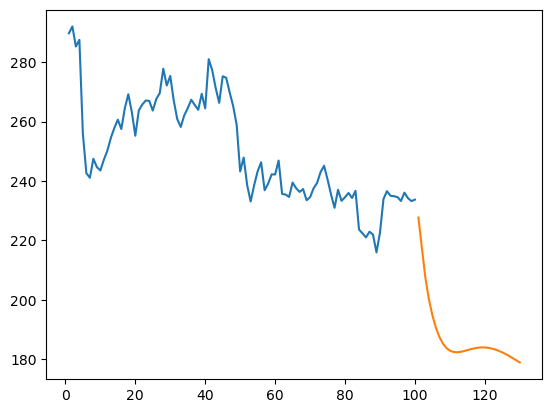

In [92]:
# plotting the previous 100 data and plotting it
plt.plot(day_new,scaler.inverse_transform(close_prices[1935:]))
# plotting the predicted data in the same graph
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.show()

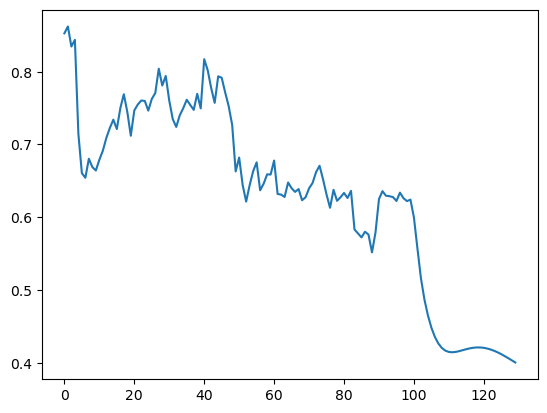

In [93]:
# creating a single plot for showing the prediction
df3=close_prices.tolist()
df3.extend(lst_output)
plt.plot(df3[1935:])
plt.show()

### Conclusions

The proposed Stock Price Predictor has been successfully trained by using LSTM
learning model on the sample datasets and the Stock value prediction process has
been successfully performed by the trained LSTM model being tested on the test
data set.